Part 1: 
●	Load the data using Python Pandas library.

●	Do Exploratory Data Analysis of the data and state your insights.

Part 2: 
●	Check the linear regression assumptions are satisfied.

●	Perform All the various feature selection techniques.

●	Provide the inferences for various methods.

●	Perform All the various data transformation techniques. 

●	Provide the inferences for various methods.

●	Perform all the regularization techniques.

●	Provide the inference from the regularization techniques.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import pylab
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import sequential_feature_selector
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [3]:
#  Load the data using Python Pandas library.
df = pd.read_csv("car-mpg.csv")
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#  Do Exploratory Data Analysis of the data and state your insights.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df = df.drop(['car_name'],axis=1)

In [7]:
df.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
df.hp.replace("?", np.nan, inplace=True)

In [9]:
df.hp[df.hp.dropna()].describe()

count     0
unique    0
Name: hp, dtype: int64

In [10]:
a=df.hp.dropna()
a=a.astype(int)
a.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: hp, dtype: float64

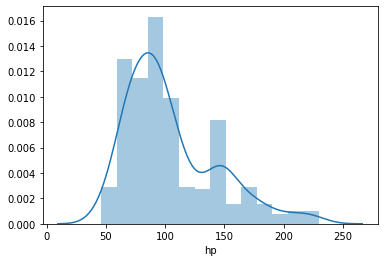

In [11]:
sns.distplot(a)

In [12]:
df.hp.fillna(df.hp.median(),inplace=True)

In [13]:
df.hp=df.hp.astype(int)

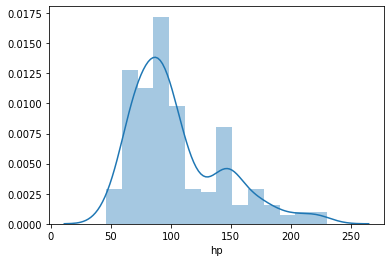

In [14]:
sns.distplot(df.hp)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg       398 non-null float64
cyl       398 non-null int64
disp      398 non-null float64
hp        398 non-null int32
wt        398 non-null int64
acc       398 non-null float64
yr        398 non-null int64
origin    398 non-null int64
dtypes: float64(3), int32(1), int64(4)
memory usage: 23.4 KB


In [16]:
df.yr.value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: yr, dtype: int64

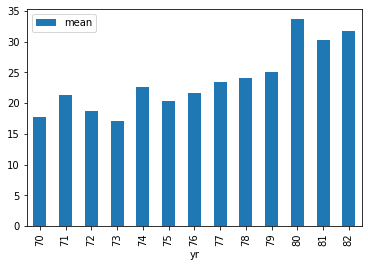

In [17]:
df.groupby('yr')['mpg'].agg(['mean']).plot.bar()

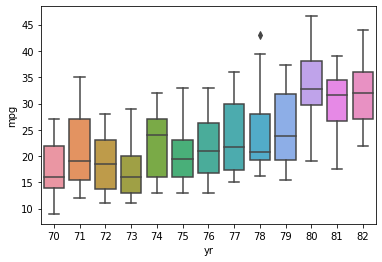

In [18]:
sns.boxplot(x='yr',y='mpg',data=df)
plt.show()

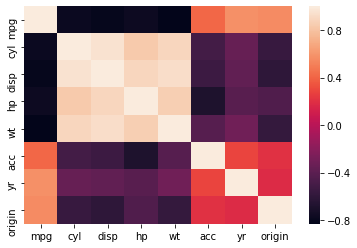

In [19]:
sns.heatmap(df.corr())

In [20]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.296482,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.224809,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


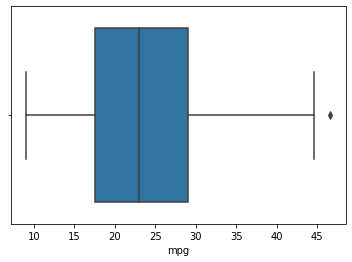

In [21]:
sns.boxplot(df.mpg)

In [22]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[df_in[col_name] < fence_high]
    return df_out

In [23]:
df=remove_outlier(df,'mpg')

In [24]:
df.mpg.isnull().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 397
Data columns (total 8 columns):
mpg       397 non-null float64
cyl       397 non-null int64
disp      397 non-null float64
hp        397 non-null int32
wt        397 non-null int64
acc       397 non-null float64
yr        397 non-null int64
origin    397 non-null int64
dtypes: float64(3), int32(1), int64(4)
memory usage: 26.4 KB


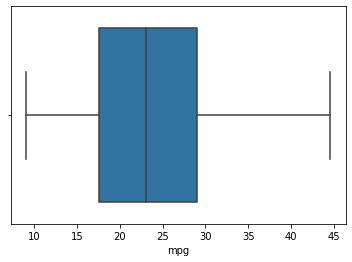

In [26]:
sns.boxplot(df.mpg)

In [28]:
# Linear regression

y=df['mpg']
X=df.drop(['mpg'],axis=1)

In [29]:
lin_reg=LinearRegression()#calling object of linear reg function
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-0.4379542   0.0186813  -0.01220722 -0.00665821  0.08951422  0.74802882
  1.34075638]
Intercept: -17.05224824077596
R^2 score: 0.8241322463356788


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("train data R square:",lin_reg.score(X_train,y_train))
print("test data R square:",lin_reg.score(X_test,y_test))

train data R square: 0.8219874135700802
test data R square: 0.8264635239131832


Inference: Based on the R2 obtained in the model, the performance is similar for train and test. So, there might not be an overfitting problem.

In [33]:
# Assumption 1- No autocorrelation

Xc=sm.add_constant(X)
lin_reg=sm.OLS(y,Xc).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.4
Date:                Thu, 24 Oct 2019   Prob (F-statistic):          1.55e-142
Time:                        22:37:46   Log-Likelihood:                -1030.2
No. Observations:                 397   AIC:                             2076.
Df Residuals:                     389   BIC:                             2108.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.0522      4.523     -3.770      0.000     -25.946      -8.159
cyl           -0.4380      0.316     -1.386      0.167      -1.059       0.183
disp           0.0187      0.007      2.533      0.012       0.004       0.033
hp            -0.0122      0.013     -0.923      0.357      -0.038       0.014
wt            -0.0067      0.001    -10.534      0.000      -0.008      -0.005
acc            0.0895      0.095      0.939      0.348      -0.098       0.277
yr             0.7480      0.050     15.079      0.000       0.650       0.846
origin         1.3408      0.272      4.937      0.000       0.807       1.875
==============================================================================
Omnibus:                       23.644   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.149
Skew:                           0.440   Prob(JB):                     2.33e-08
Kurtosis:                       4.161   Cond. No.                     8.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

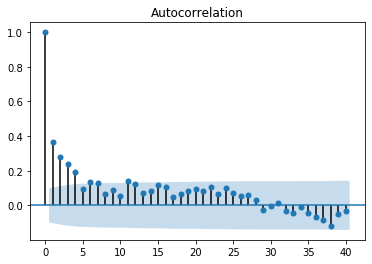

In [34]:
acf=smt.graphics.plot_acf(lin_reg.resid,lags=40,alpha=0.05)

Inference:  Durbin- Watson Test.

- It's value ranges from 0-4. 
- If the value is between 0-2, it's known as Positive Autocorrelation.
- If the value ranges from 2-4, it is known as Negative autocorrelation.
- If the value is exactly 2, it means No Autocorrelation.
- For a good linear model, it should have low or no autocorrelation.

We can see here that the values of Durbin Watson test (test for normality) is 1.259 (POSITIVE AUTO-CORRELATION)
    
From the graph, we can easily see that there is somewhat Positive autocorrelation.

In [35]:
# Assumption 2- Normality of Residuals

print(stats.jarque_bera(lin_reg.resid))

(35.148970805742294, 2.330762205460246e-08)


The Jarque Bera test shows the JB value and the p-value for the hypothesis testing.
The critical chi square value at the 5% level of significance is 5.99. If the computed value exceeds this value the null hypothesis is rejected.

In this case the computed value of the JB value 35.14 is greater than 5.99. Thus we reject the null hypothesis that the error terms are normally distributed.

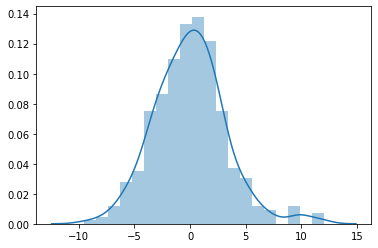

In [36]:
sns.distplot(lin_reg.resid)

Inference:
For a good model, the residuals should be normally distributed. The higher the value of Jarque Bera test , the lesser the residuals are normally distributed. We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A large value for the jarque-bera test indicates non normality.

The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution. Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

### Asssumption 3 - Linearity of residuals

Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals.
Or we can go for rainbow test. Let's look both of them one by one.


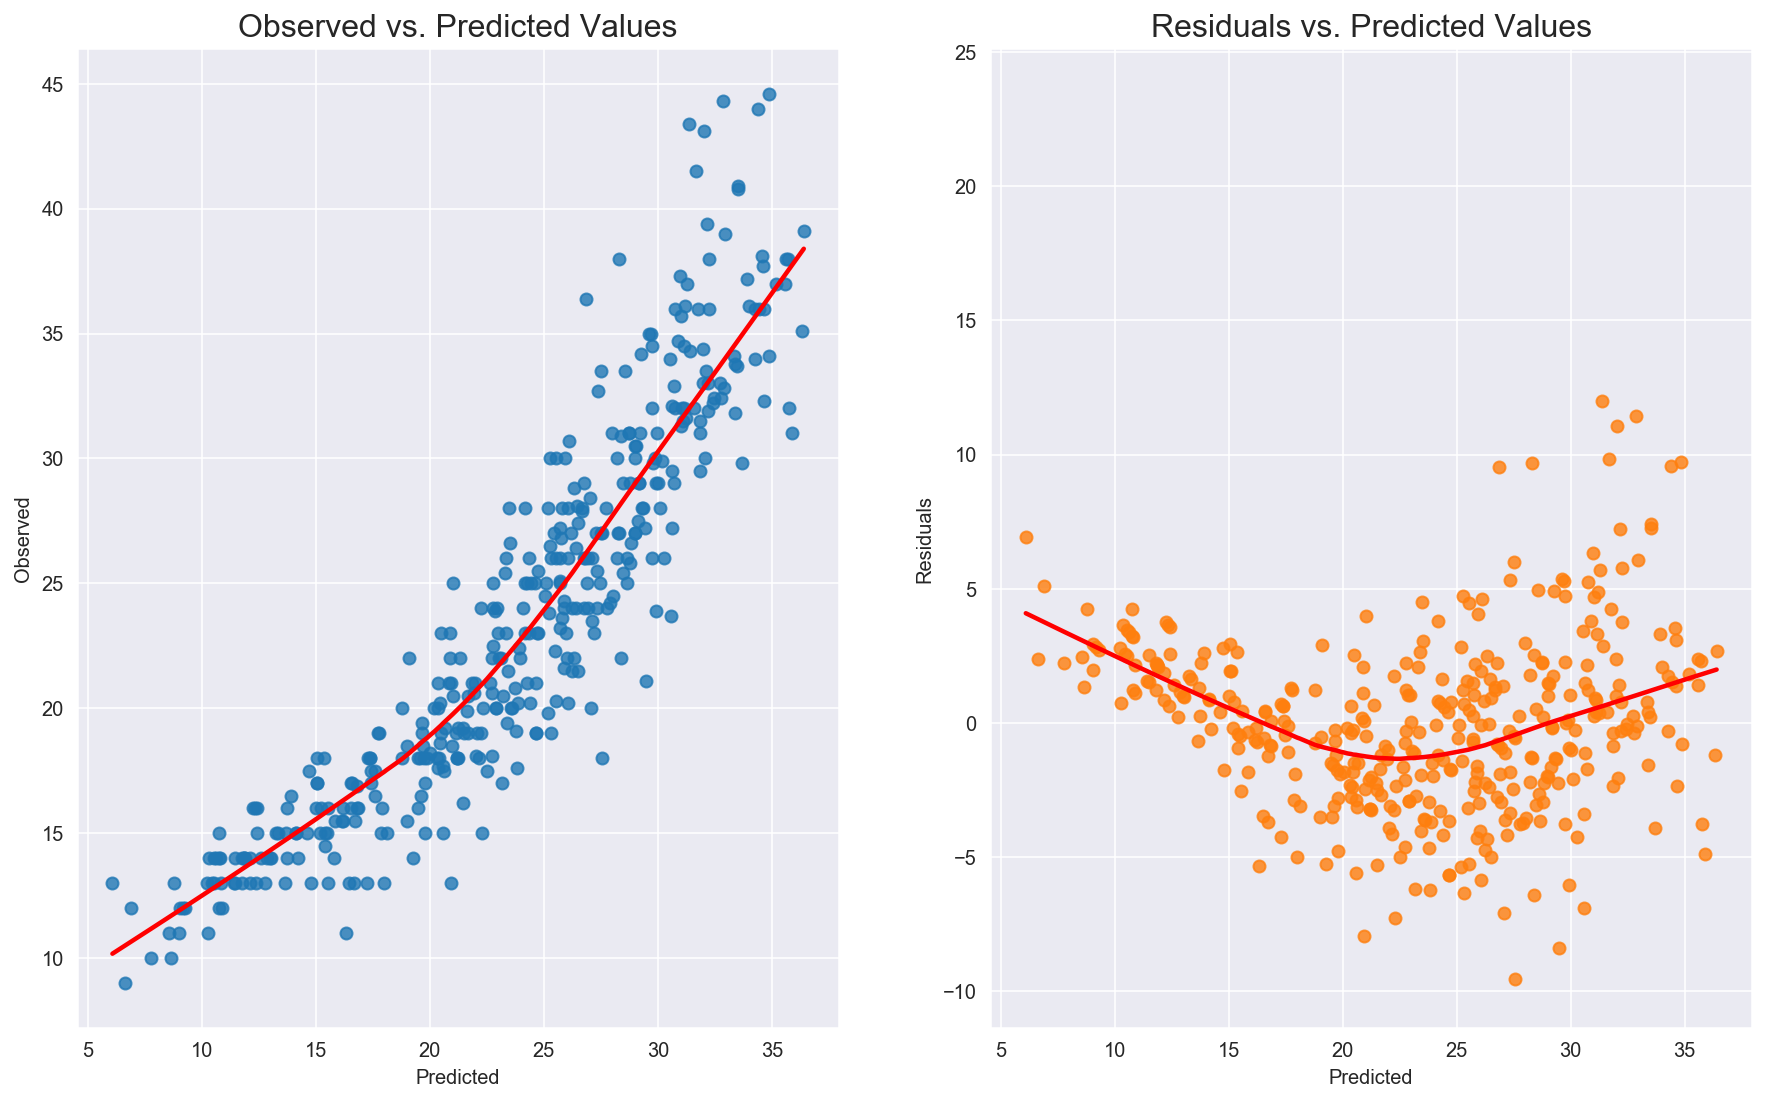

In [37]:

%config InlineBackend.figure_format ='retina'
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

Inference: 
    
To detect nonlinearity one can inspect plots of observed vs. predicted values or residuals vs. predicted values. 
The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or 
around horizontal line in the latter one. 
In both cases linearity of residuals can be seen.

### Rainbow test 
- It is done to check the linearity of the residuals for a linear regression model. Linearity of residuals is preferred.


In [38]:

sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(1.6785647190343156, 0.00017304637828732575)

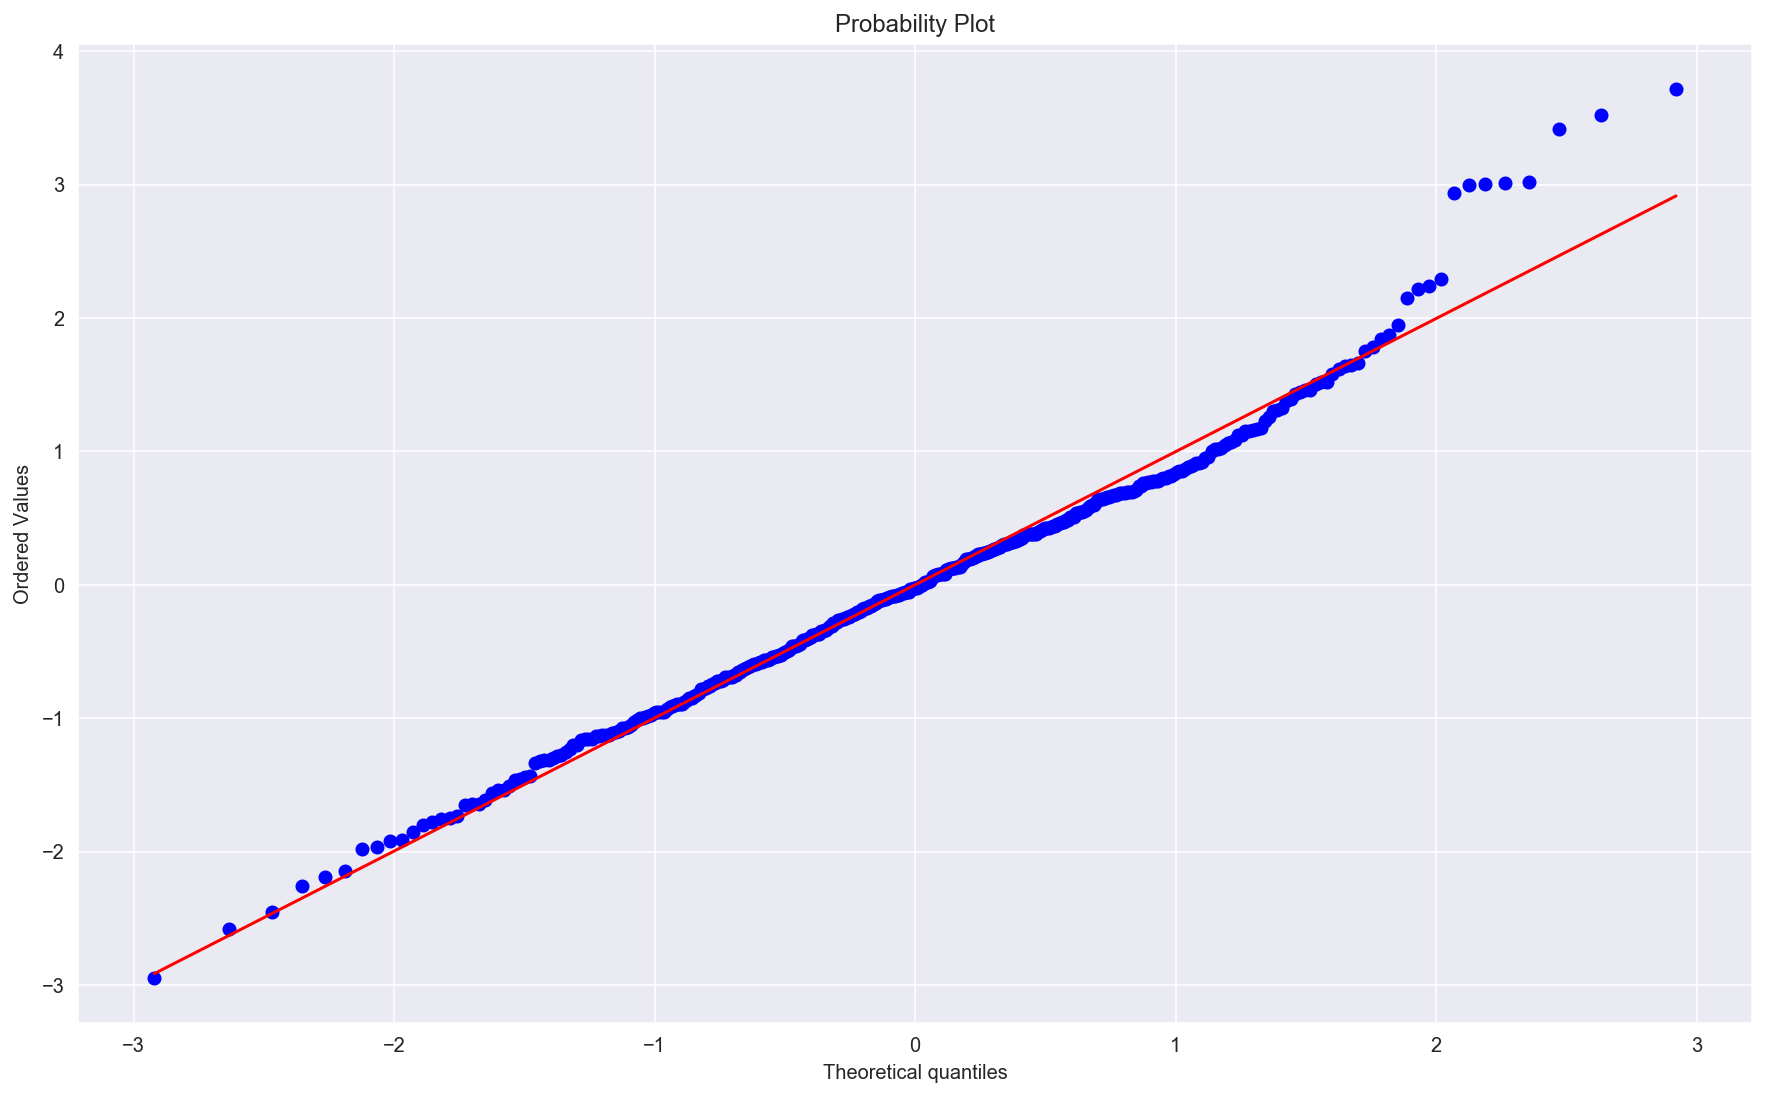

In [39]:
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [40]:
lin_reg.resid.mean()

-6.760447225818233e-13

Inference: The mean value of the residuals is very much close to zero. -6.76 * 10^(-13)

So, linearity is present.

### Assumption 4 - Homoscedasticity test(using goldfeld test) 

Homoscedacity : If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.
Heteroscedacity : If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.


[('F statistic', 2.198893573366795), ('p-value', 4.054178338151619e-08)]

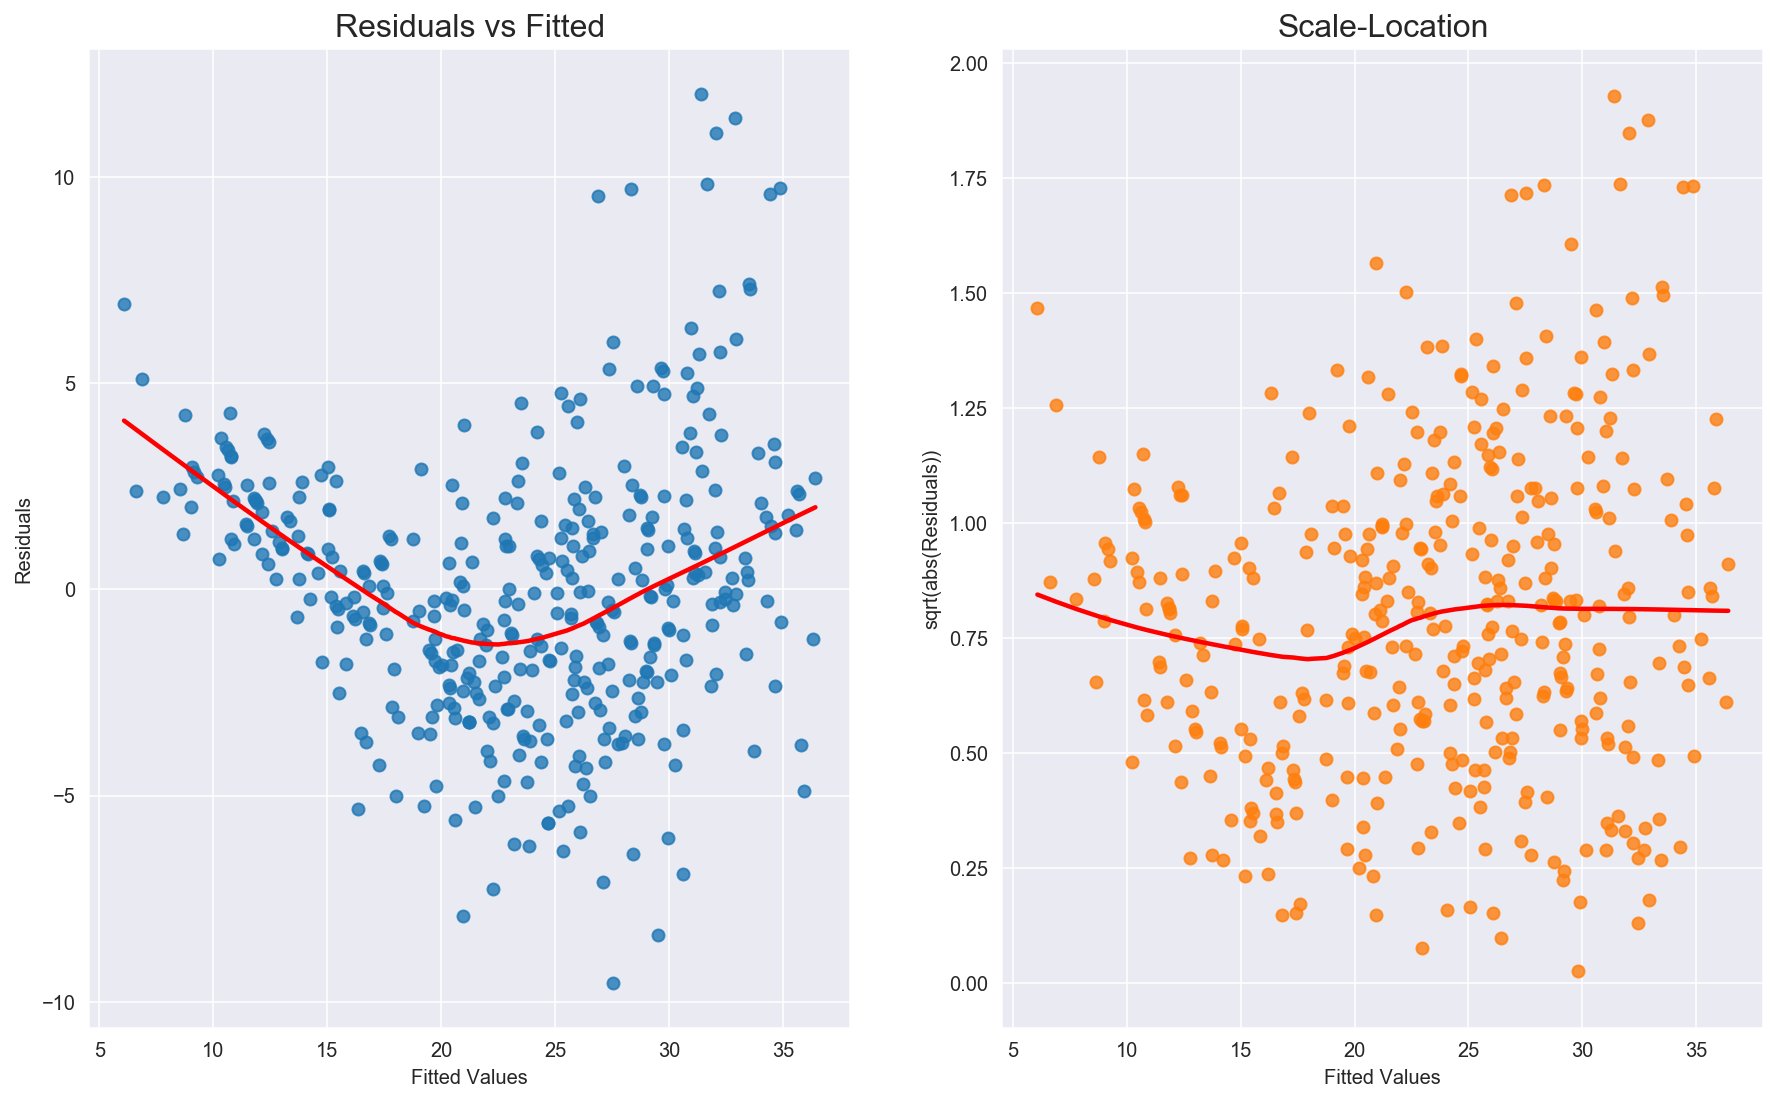

In [41]:

from statsmodels.compat import lzip
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

#### Assumption 5- No multi collinearity

The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [42]:
vif = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,cyl,disp,hp,wt,acc,yr,origin
vif,10.679037,21.841411,9.442353,10.580052,2.552098,1.242007,1.742405


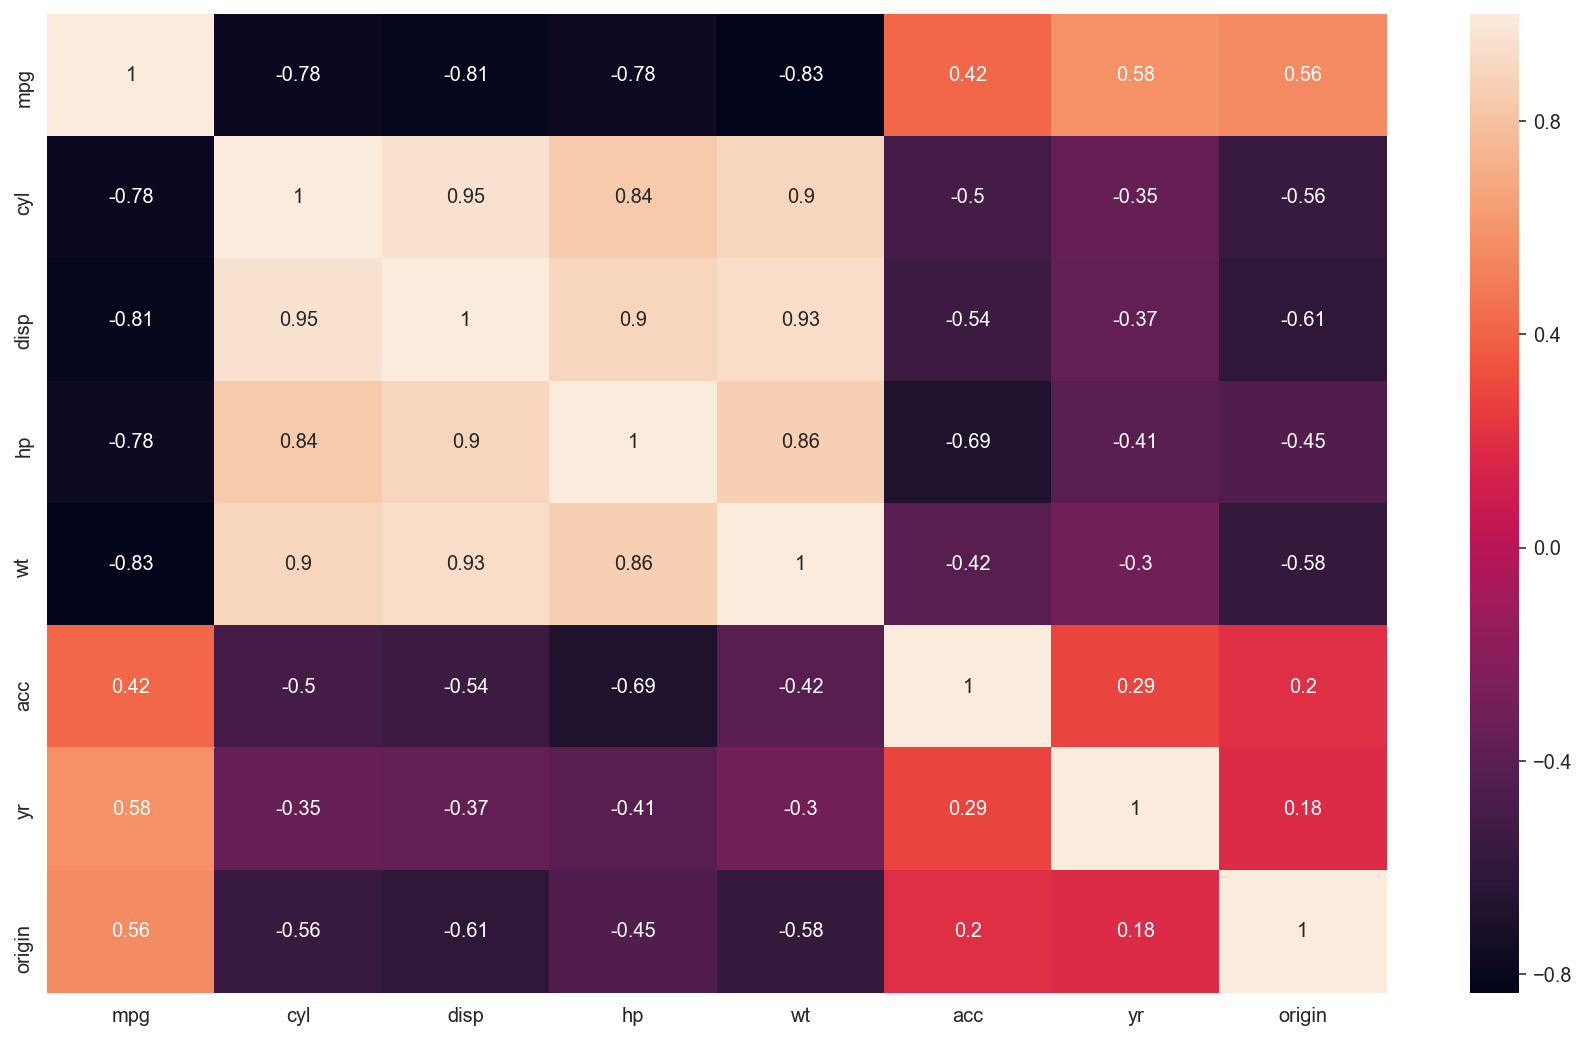

In [43]:
sns.heatmap(df.corr(), annot=True)

Inference: Multicollinearity exists. This vif column has be built with the help of X_constant and not the X_values. Because we built our model by adding Constant.

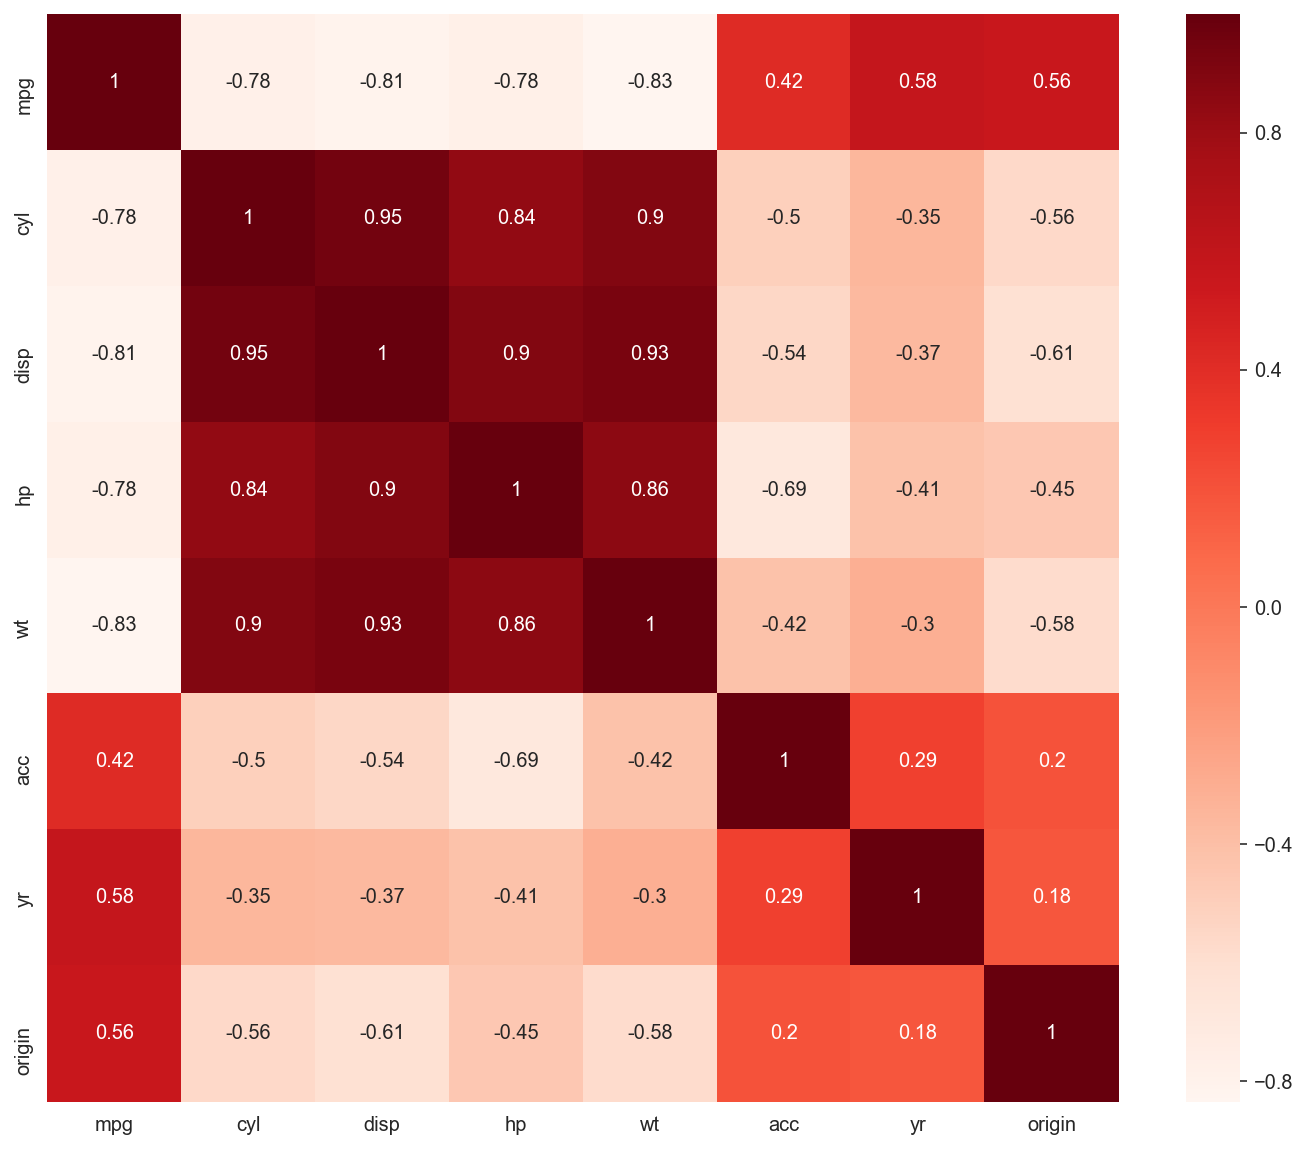

In [45]:
# Perform All the various feature selection techniques.

# 1.Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [46]:
cor_target = abs(cor["mpg"])      #Correlation with output variable
relevant_features = cor_target[cor_target>0.5]    #Selecting highly correlated features
relevant_features

mpg       1.000000
cyl       0.778350
disp      0.806521
hp        0.775468
wt        0.834482
yr        0.578468
origin    0.558579
Name: mpg, dtype: float64

In [48]:
# 2. Backward elimination

X_1 = sm.add_constant(X)     #Adding constant column of ones, mandatory for sm.OLS model
model = sm.OLS(y,X_1).fit()  #Fitting sm.OLS model

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['wt', 'yr', 'origin']


In [49]:
# 3. RFE - Recursive Feature Elimination

model = LinearRegression()      #Initializing RFE model
rfe = RFE(model, 11)            #Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
model.fit(X_rfe,y)              #Fitting the data to model
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


In [50]:
X.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

In [52]:
#no of features
no_of_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(no_of_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,no_of_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = no_of_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 7
Score with 7 features: 0.827826


In [53]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')


In [54]:
# Step Forward Selection

# Build RF classifier to use in feature selection
clf = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(clf,k_features = 7,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2019-10-24 23:07:54] Features: 1/7 -- score: 0.6788347552177213[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2019-10-24 23:07:54] Features: 2/7 -- score: 0.8001592327009893[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2019-10-24 23:07:54] Features: 3/7 -- score: 0.8045921181893249[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

So, we can see that For 5/7 (5 out of 7 features) , the r2 (R_squared value) is maximum i.e. 80.63%. So, we will build the model again with K_features = 5

In [55]:
# Build RF classifier to use in feature selection
clf = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(clf,k_features = 5,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2019-10-24 23:08:18] Features: 1/5 -- score: 0.6788347552177213[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2019-10-24 23:08:18] Features: 2/5 -- score: 0.8001592327009893[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2019-10-24 23:08:19] Features: 3/5 -- score: 0.8045921181893249[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [56]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 5, 6]


In [57]:
X.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

In [58]:
# Embedded method

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 5.455052
Best score using built-in LassoCV: 0.770858


In [59]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

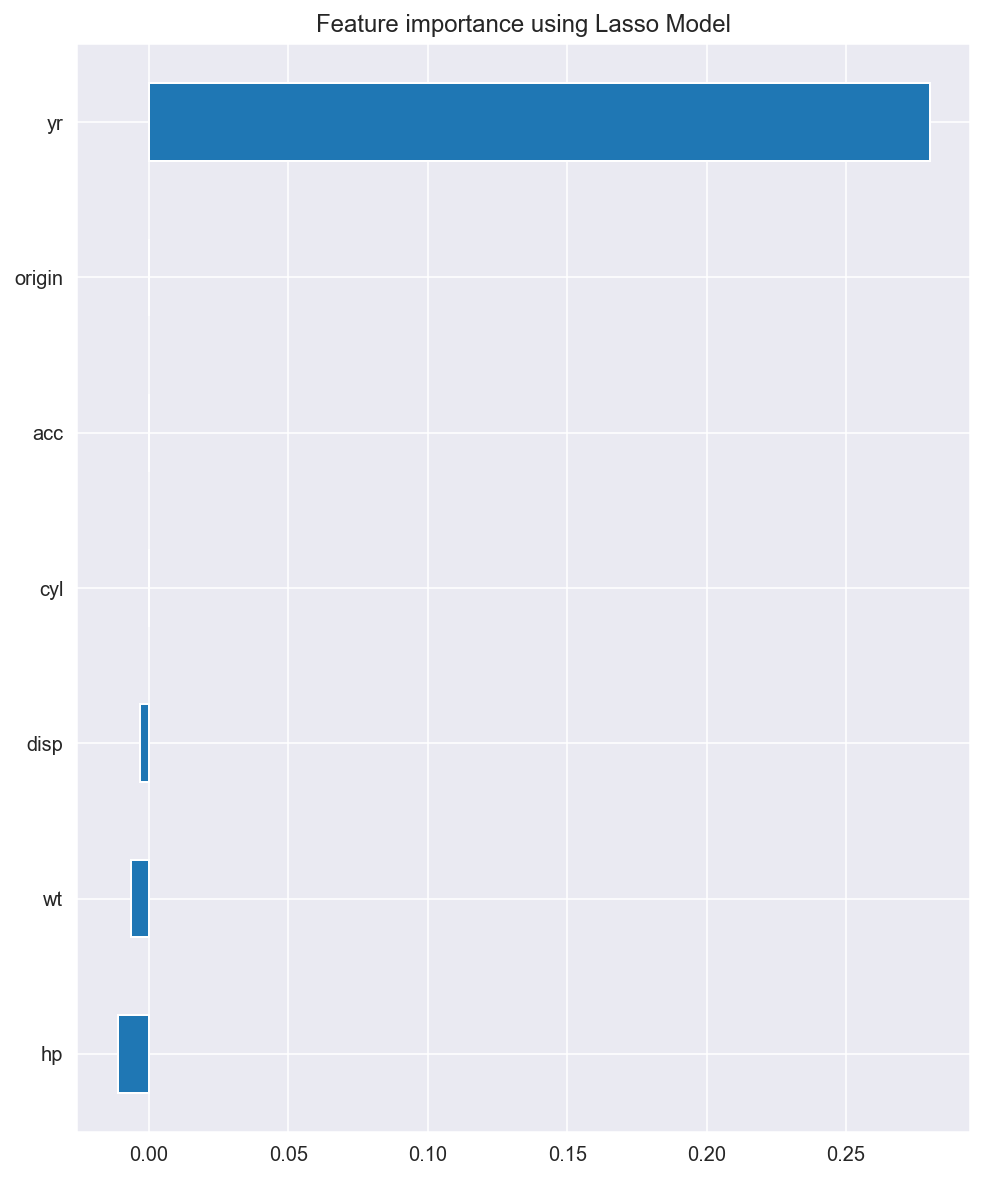

In [60]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [66]:
# data transformation techniques

df1 = df.copy()
X = df1.drop(['mpg'],axis=1)
y = df1.mpg
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.4
Date:                Thu, 24 Oct 2019   Prob (F-statistic):          1.55e-142
Time:                        23:11:08   Log-Likelihood:                -1030.2
No. Observations:                 397   AIC:                             2076.
Df Residuals:                     389   BIC:                             2108.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.0522      4.523     -3.770      0.000     -25.946      -8.159
cyl           -0.4380      0.316     -1.386      0.167      -1.059       0.183
disp           0.0187      0.007      2.533      0.012       0.004       0.033
hp            -0.0122      0.013     -0.923      0.357      -0.038       0.014
wt            -0.0067      0.001    -10.534      0.000      -0.008      -0.005
acc            0.0895      0.095      0.939      0.348      -0.098       0.277
yr             0.7480      0.050     15.079      0.000       0.650       0.846
origin         1.3408      0.272      4.937      0.000       0.807       1.875
==============================================================================
Omnibus:                       23.644   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.149
Skew:                           0.440   Prob(JB):                     2.33e-08
Kurtosis:                       4.161   Cond. No.                     8.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
#residual plot
sns.set(style = 'whitegrid')

df1['predictions'] = model.predict(X_constant)
residuals = model.resid

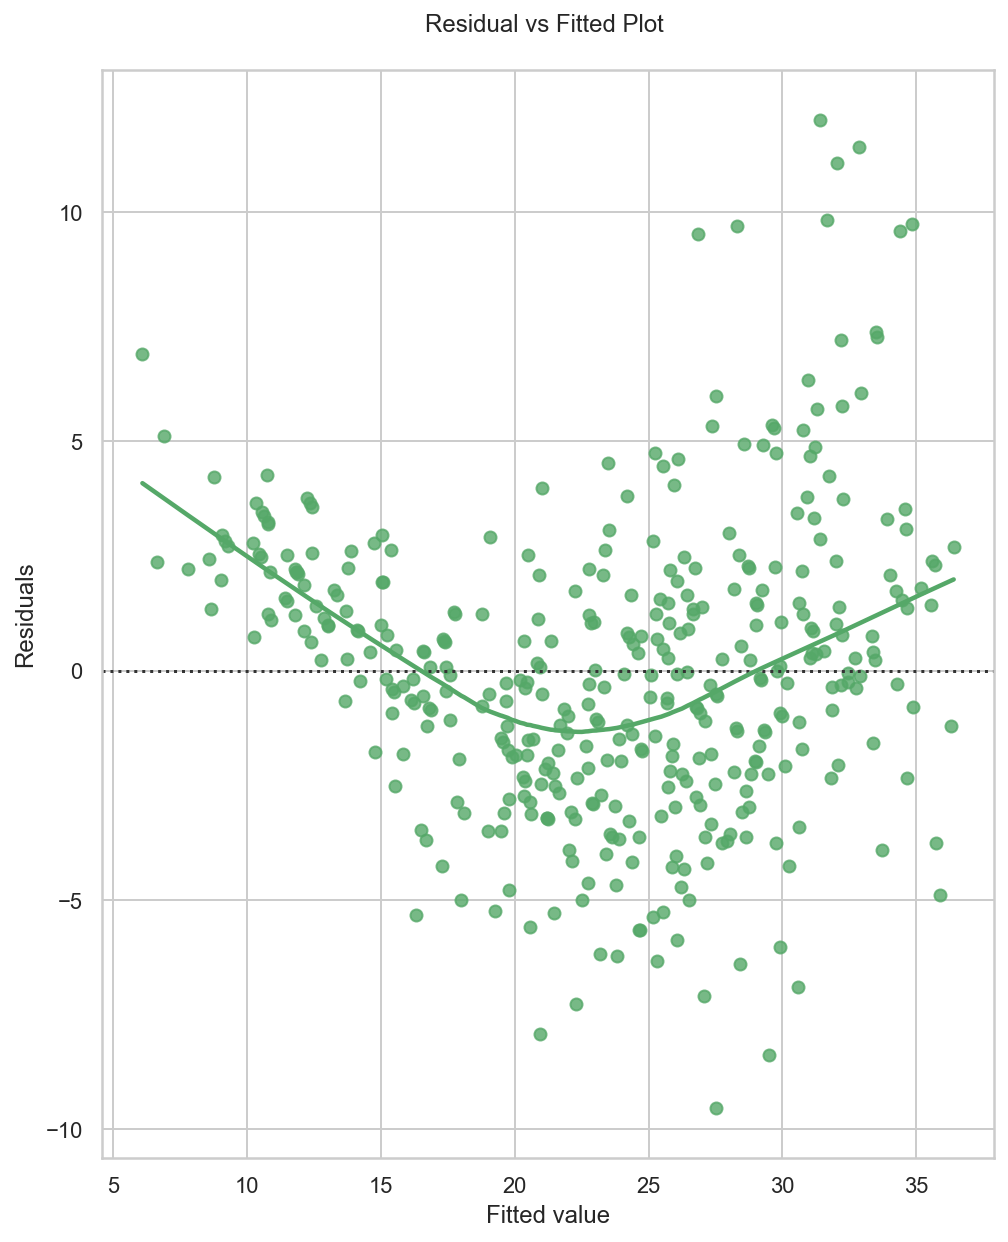

In [68]:
ax = sns.residplot(df1.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

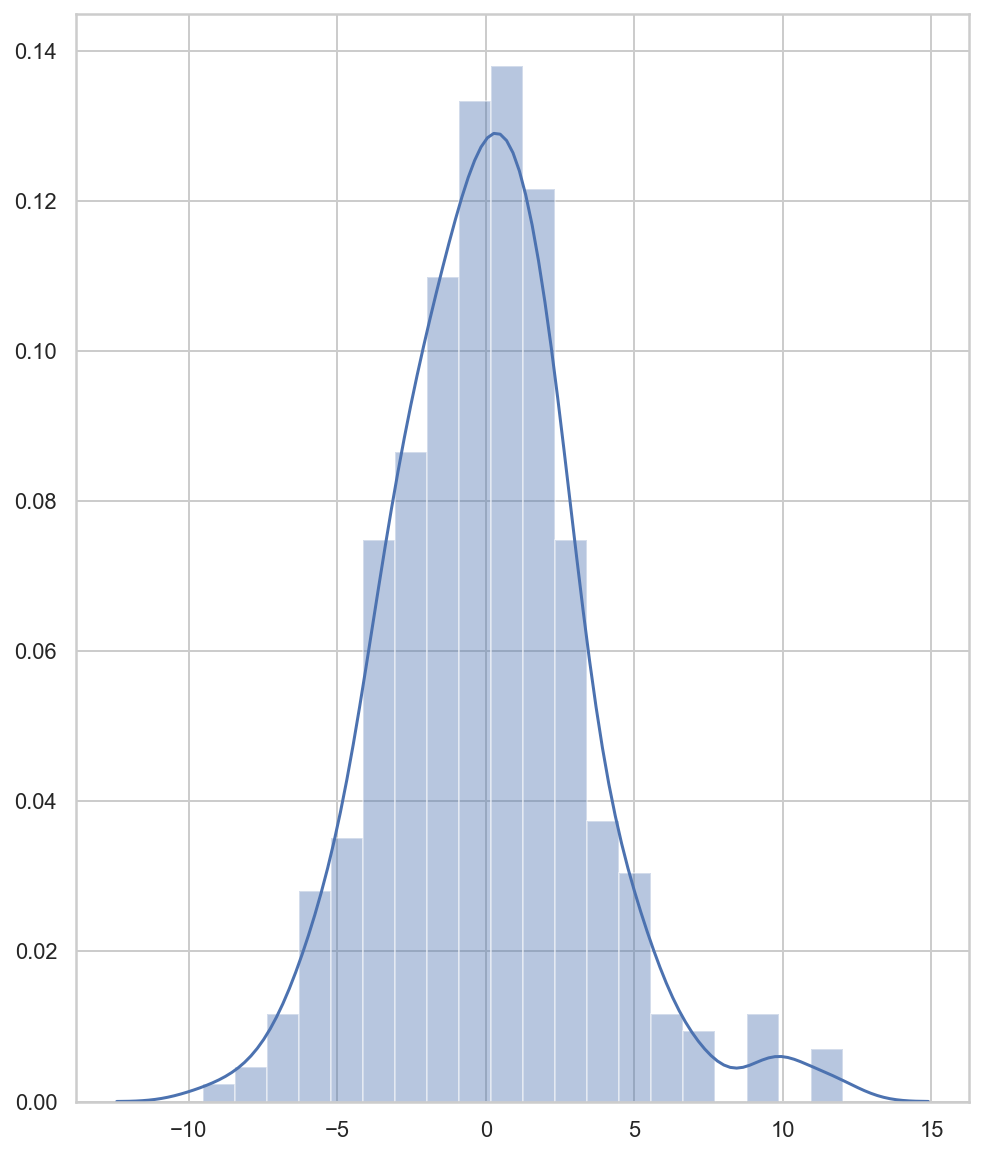

In [69]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

In [71]:
# square root transformation
df2 = df.copy()
final_df = df2.transform(lambda x: x**0.5)
final_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,4.242641,2.828427,17.521415,11.401754,59.194594,3.464102,8.3666,1.0
1,3.872983,2.828427,18.708287,12.845233,60.770058,3.391165,8.3666,1.0
2,4.242641,2.828427,17.832555,12.247449,58.617404,3.316625,8.3666,1.0
3,4.000000,2.828427,17.435596,12.247449,58.591808,3.464102,8.3666,1.0
4,4.123106,2.828427,17.378147,11.832160,58.728187,3.240370,8.3666,1.0


In [72]:
X = final_df.drop(['mpg'],axis=1)
y = final_df.mpg
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     364.8
Date:                Thu, 24 Oct 2019   Prob (F-statistic):          1.39e-166
Time:                        23:12:52   Log-Likelihood:                -71.365
No. Observations:                 397   AIC:                             158.7
Df Residuals:                     389   BIC:                             190.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0185      0.825     -2.446      0.015      -3.641      -0.396
cyl           -0.0881      0.139     -0.633      0.527      -0.362       0.186
disp           0.0176      0.021      0.846      0.398      -0.023       0.059
hp            -0.0768      0.027     -2.843      0.005      -0.130      -0.024
wt            -0.0643      0.007     -9.137      0.000      -0.078      -0.050
acc           -0.0854      0.074     -1.156      0.248      -0.231       0.060
yr             1.2664      0.077     16.365      0.000       1.114       1.418
origin         0.2520      0.069      3.634      0.000       0.116       0.388
==============================================================================
Omnibus:                       11.096   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               17.721
Skew:                           0.173   Prob(JB):                     0.000142
Kurtosis:                       3.975   Cond. No.                     3.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
#residual plot
sns.set(style = 'whitegrid')

df2['predictions'] = model.predict(X_constant)
residuals = model.resid


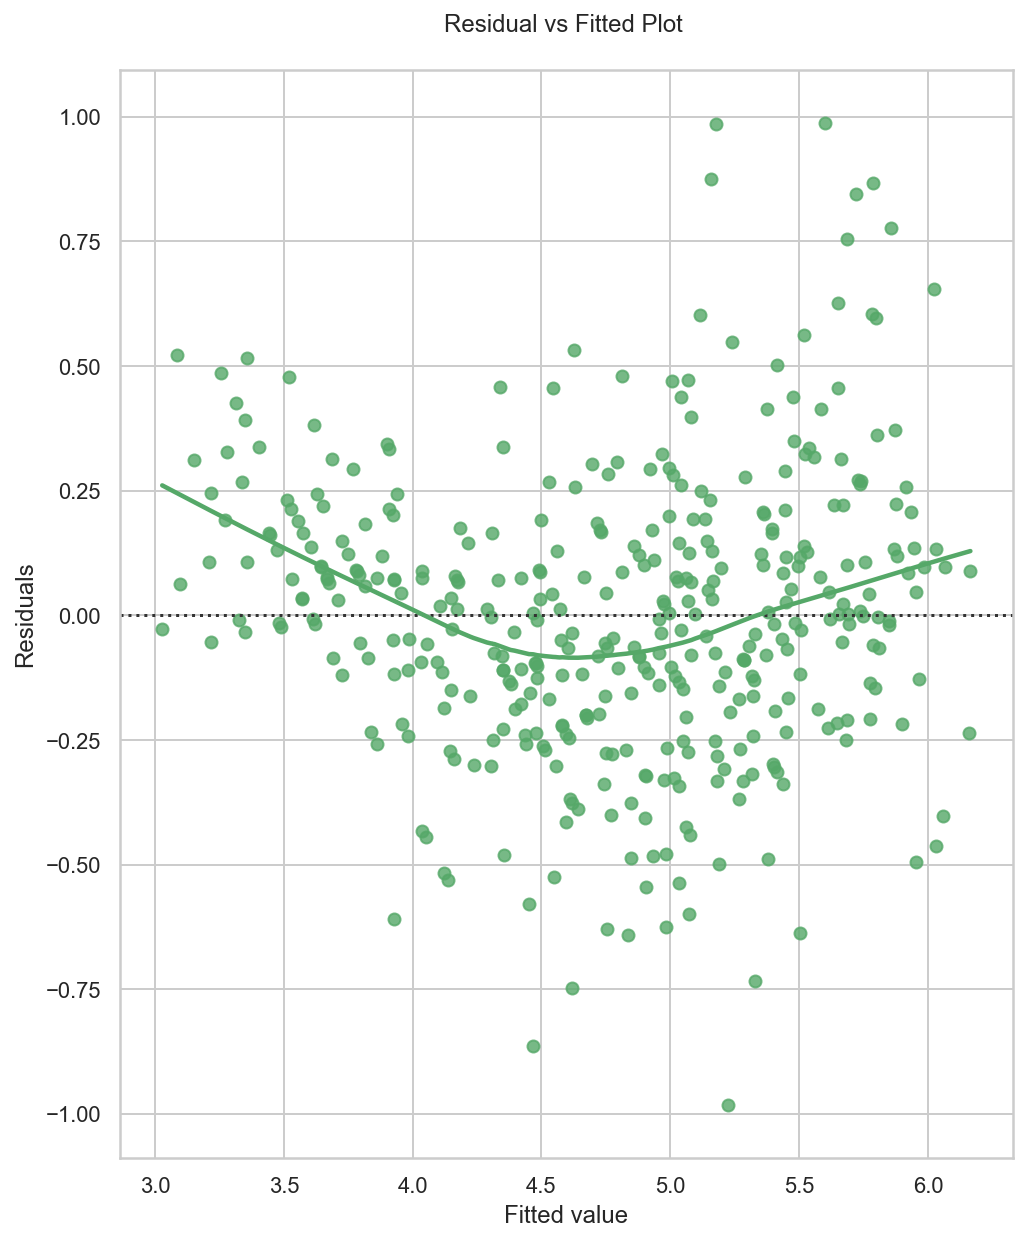

In [74]:
ax = sns.residplot(df2.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

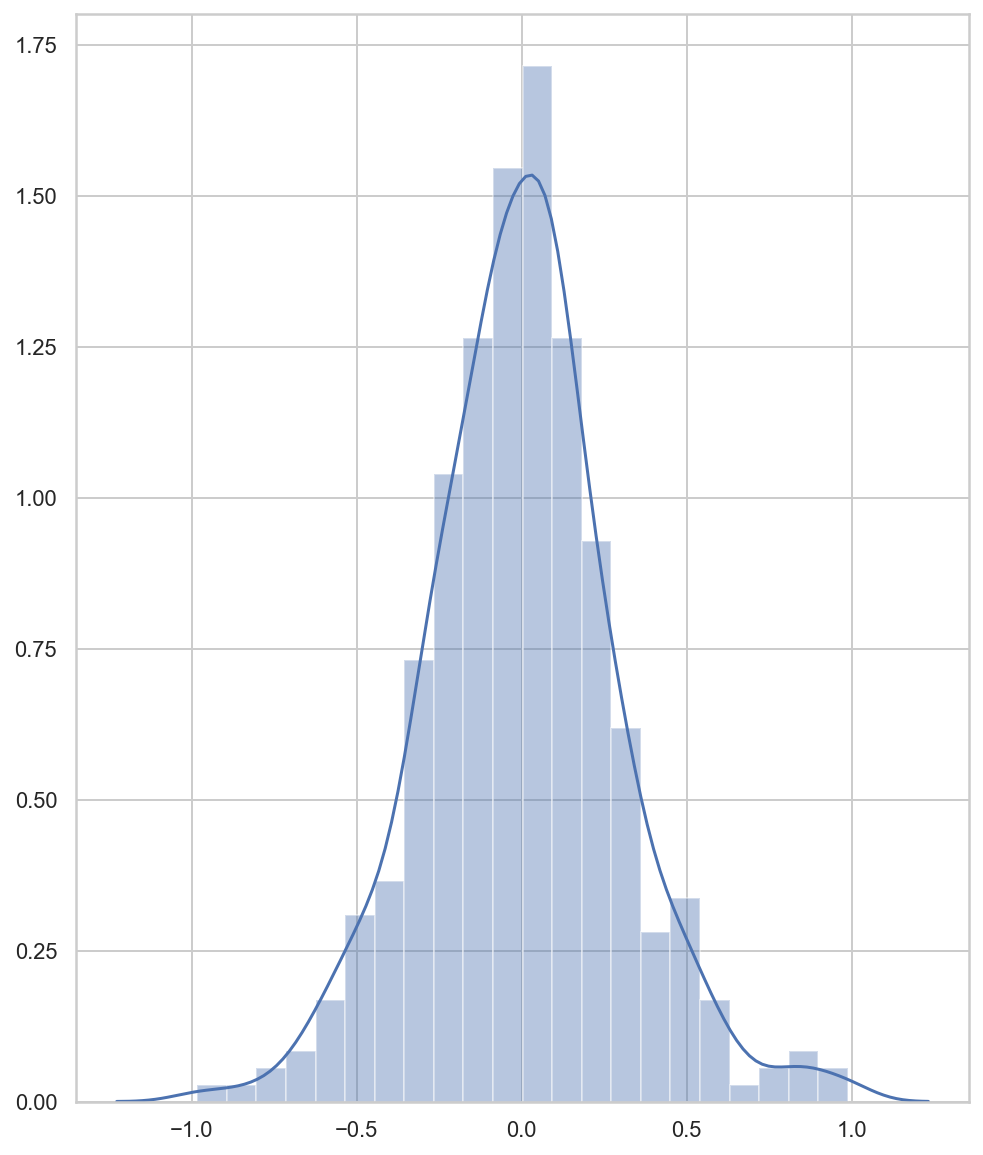

In [75]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

In [76]:
df2 = df.copy()
df_final1 = df2.transform(lambda X: np.log(X))
df_final1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,2.890372,2.079442,5.726848,4.867534,8.161660,2.484907,4.248495,0.0
1,2.708050,2.079442,5.857933,5.105945,8.214194,2.442347,4.248495,0.0
2,2.890372,2.079442,5.762051,5.010635,8.142063,2.397895,4.248495,0.0
3,2.772589,2.079442,5.717028,5.010635,8.141190,2.484907,4.248495,0.0
4,2.833213,2.079442,5.710427,4.941642,8.145840,2.351375,4.248495,0.0


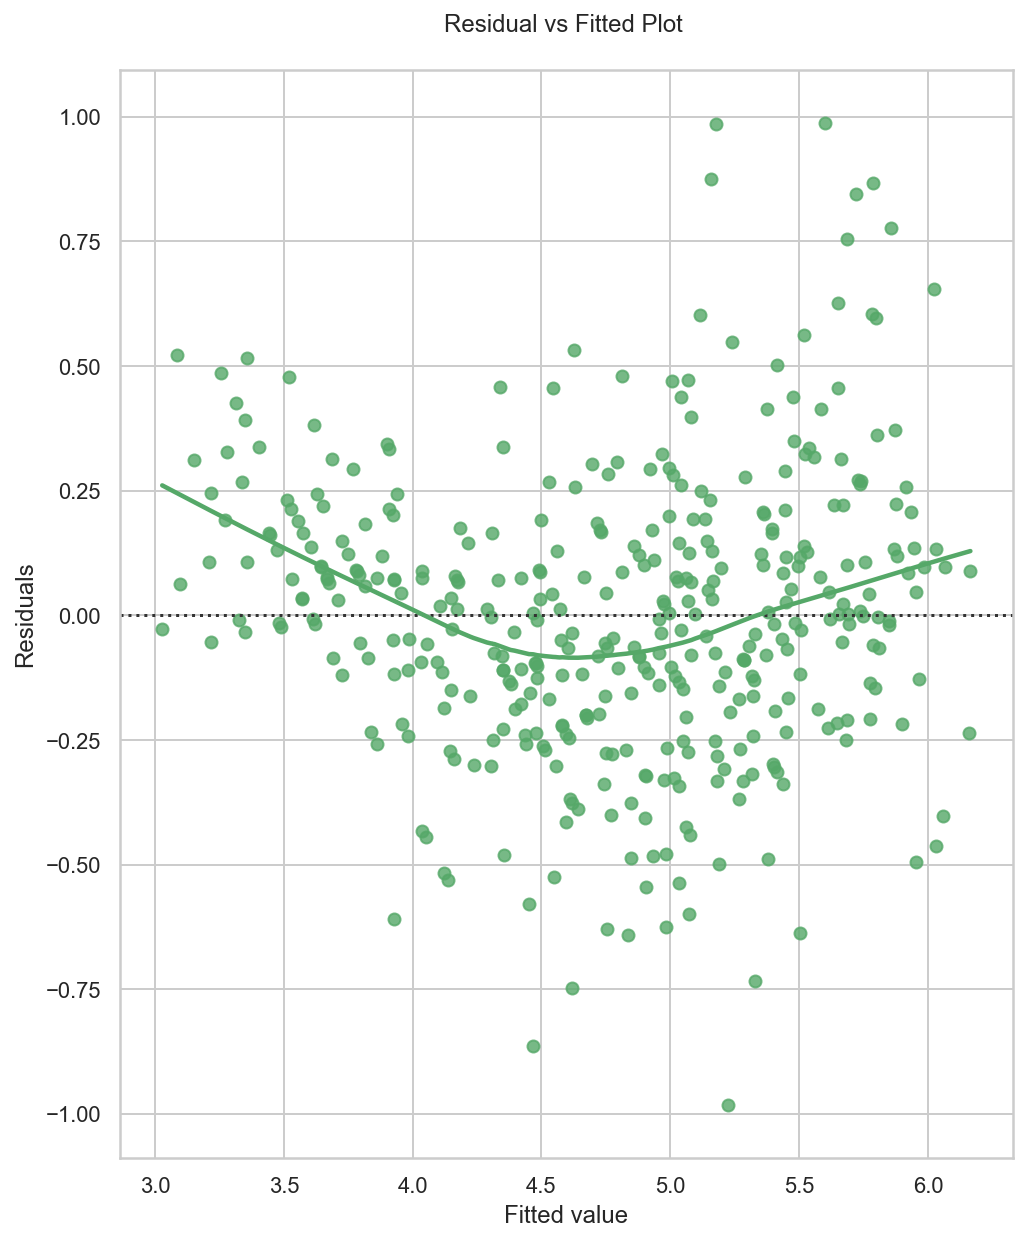

In [77]:
#residual plot
sns.set(style = 'whitegrid')

df2['predictions'] = model.predict(X_constant)
residuals = model.resid
ax = sns.residplot(df2.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

In [78]:
df2 = df.copy()
df_final1 = df2.transform(lambda X: np.exp(X))
df_final1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,6.565997e+07,2980.957987,2.130129e+133,2.872650e+56,inf,162754.791419,2.515439e+30,2.718282
1,3.269017e+06,2980.957987,1.007091e+152,4.556061e+71,inf,98715.771011,2.515439e+30,2.718282
2,6.565997e+07,2980.957987,1.275397e+138,1.393710e+65,inf,59874.141715,2.515439e+30,2.718282
3,8.886111e+06,2980.957987,1.060529e+132,1.393710e+65,inf,162754.791419,2.515439e+30,2.718282
4,2.415495e+07,2980.957987,1.435270e+131,6.327432e+60,inf,36315.502674,2.515439e+30,2.718282


In [79]:
# Regularisation

matplotlib.rcParams.update({'font.size': 12})

## Ridge

lr = LinearRegression()
lr.fit(X_train, y_train)

# higher the alpha value, more restriction on the coefficients; 
# low alpha > more generalization, coefficients are barely
rr = Ridge(alpha=0.01) 
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.819557342907983
linear regression test score: 0.8278258400796692
ridge regression train score low alpha: 0.8195573427893926
ridge regression test score low alpha: 0.8278259427419137
ridge regression train score high alpha: 0.8166846172882096
ridge regression test score high alpha: 0.8257412882026373


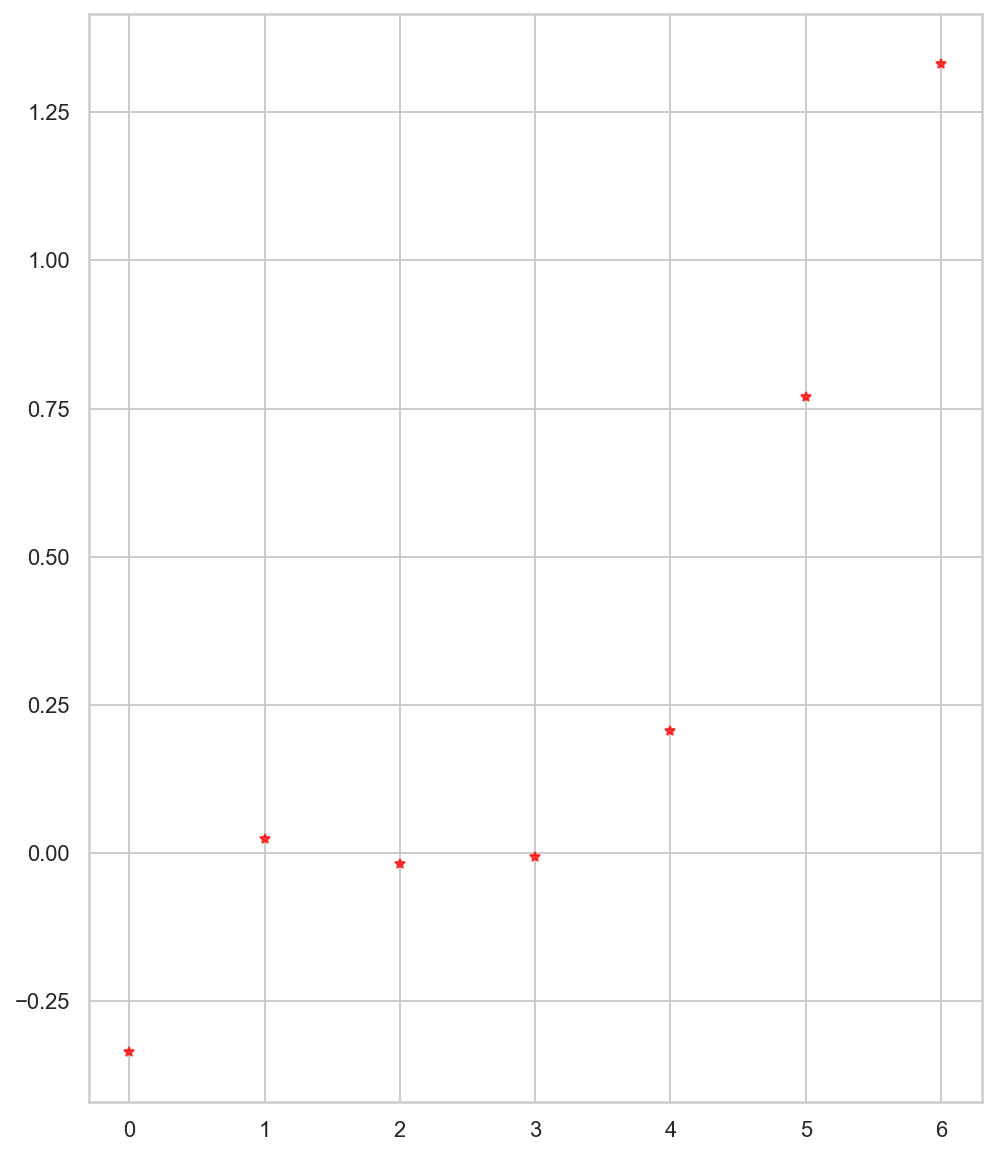

In [82]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers

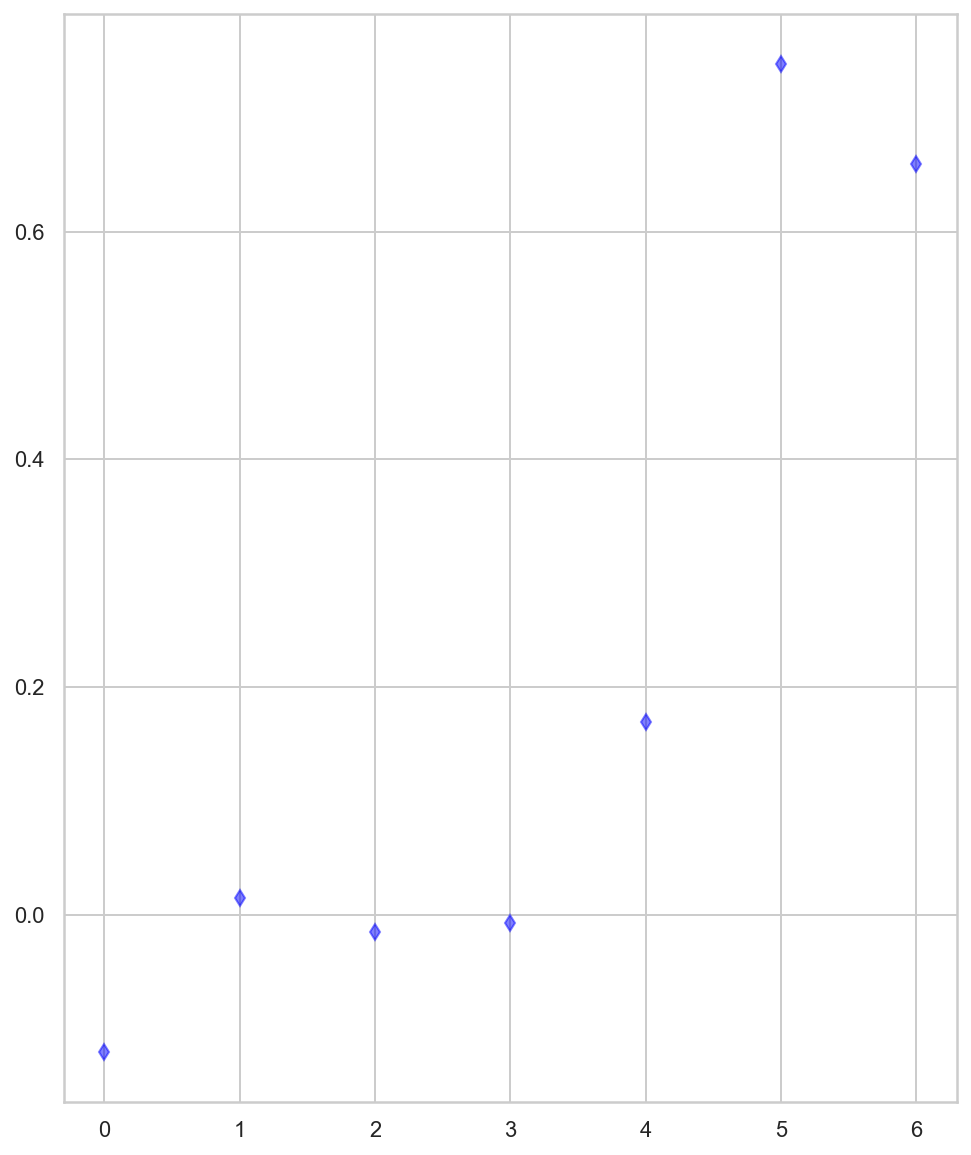

In [83]:
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency

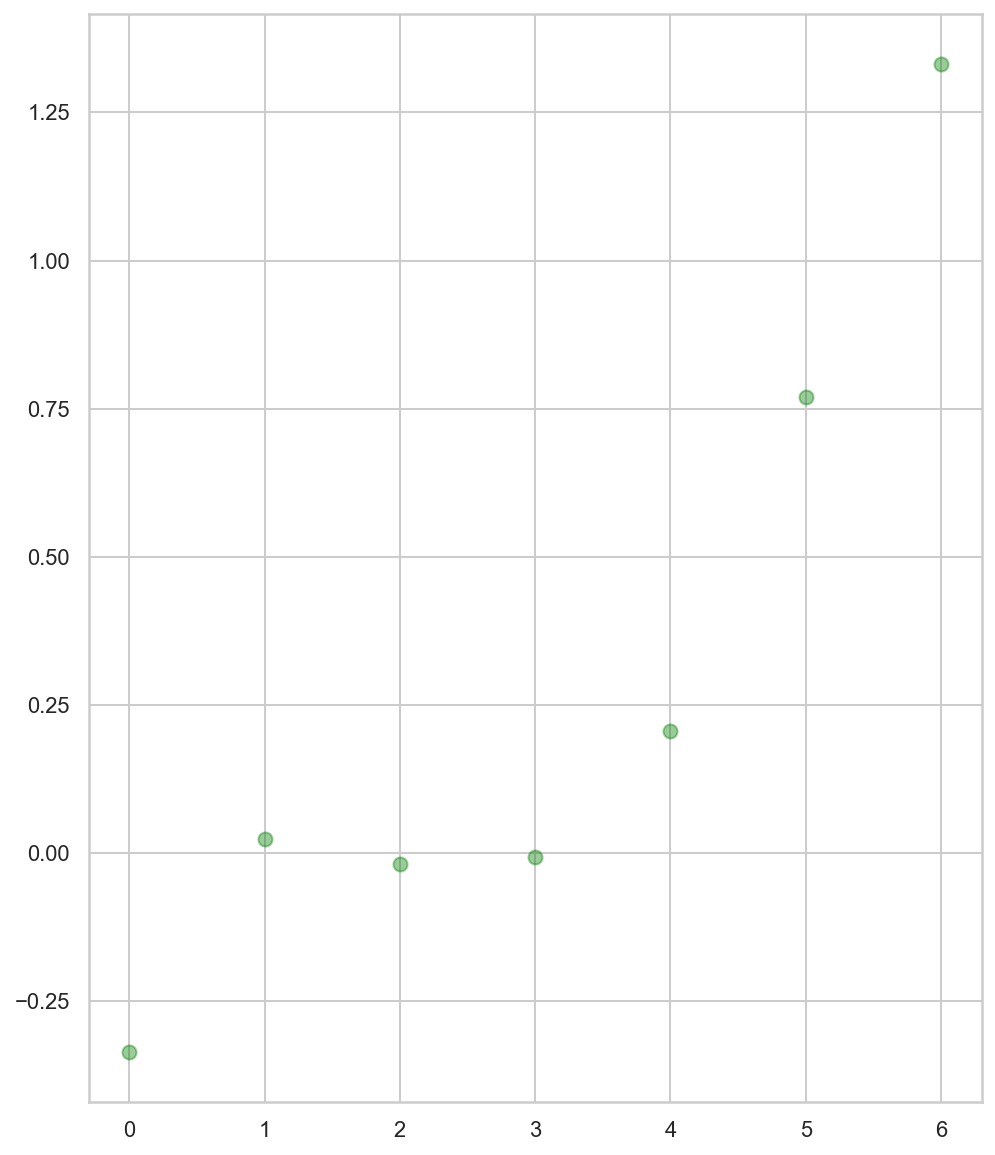

In [84]:
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

In [85]:
 # Lasso
    
X = final_df.drop(['mpg'],axis=1)
y = final_df.mpg

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=31)

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.7046506710411478
test score:  0.7222198131726303
number of features used:  1


In [86]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print("training score for alpha=0.01:", train_score001 )
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.8611953615269574
test score for alpha =0.01:  0.8560414741978032
number of features used: for alpha =0.01: 5


In [88]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha=0.0001:", train_score00001 )
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.8701161688401519
test score for alpha =0.0001:  0.8577318800801699
number of features used: for alpha =0.0001: 7


In [91]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print("LR training score:", lr_train_score )
print("LR test score: ", lr_test_score)

LR training score: 0.8701188907825468
LR test score:  0.8577086119351708


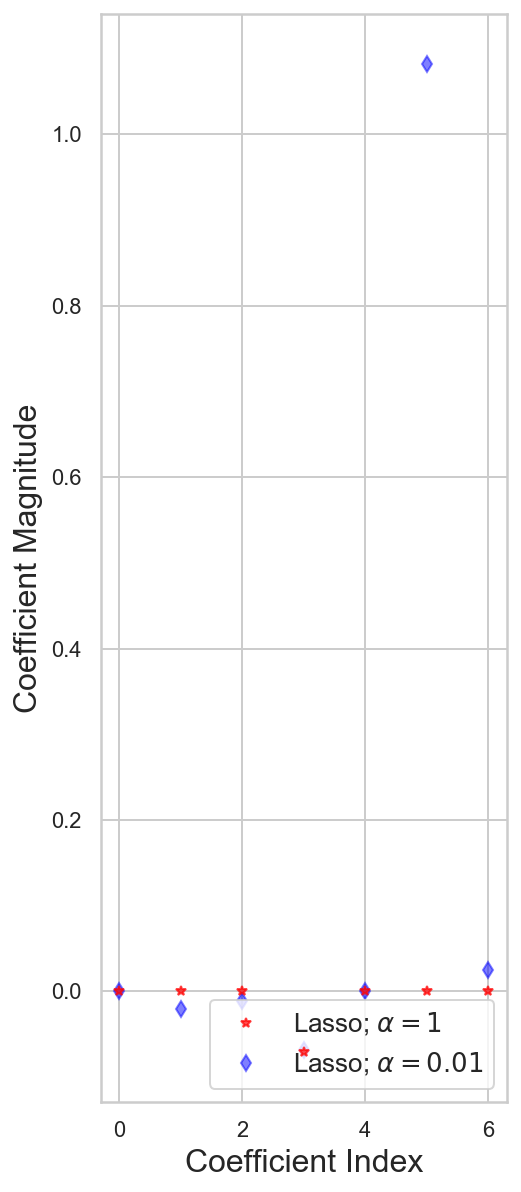

In [92]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

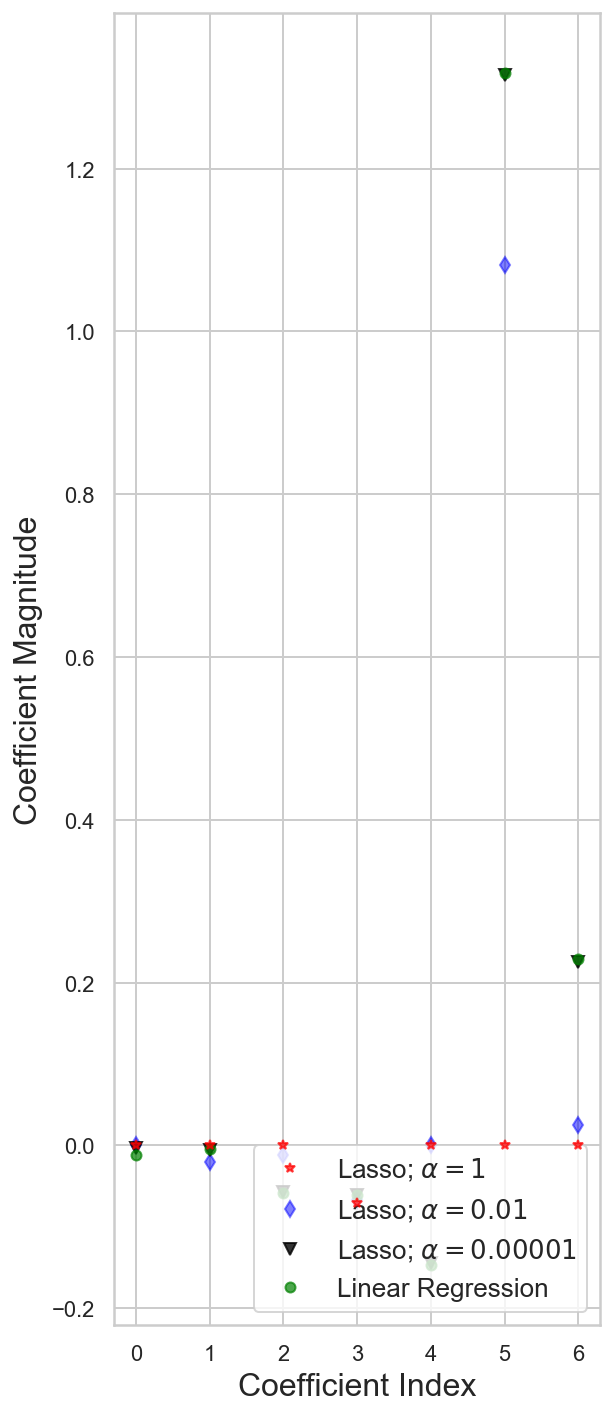

In [93]:
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [94]:
## Elastic Net 
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')
cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [95]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00085634
Optimal l1_ratio: 1.000
Number of iterations 69


In [96]:
# train model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train, y_train)

ElasticNet(alpha=0.0008563382341060448, copy_X=True, fit_intercept=True,
           l1_ratio=1.0, max_iter=69, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [97]:
print(r2_score(y_train, model.predict(X_train))) # training data performance

0.8680585117543534


In [98]:
print(r2_score(y_test, model.predict(X_test))) # test data performance

0.8583944686526472
